In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import elasticnet
import numpy as np

In [3]:
# data
N,D = 100, 5
x = np.random.uniform(size=(N,D))
# compute y.  coefs are [0, -1, 2, 0, -4, 5, 0, -7, -8, ...]
true_intercept = -1
true_params = []
y = np.zeros(N) + true_intercept
for j in range(D):
    jmod3 = j%3
    if jmod3==0:   coef = 0
    elif jmod3==1: coef = -j
    else:          coef = j
    true_params.append(coef)
    y += ((x[:,j]- x[:,j].mean()) / x[:,j].std()) * coef

In [4]:
#  construct the data
data = elasticnet.Data(x,y, num_threads=4)

# look at means and stds of the standardized data
display(data.get_means())
display(data.get_stds())

array([0.48538753, 0.51935747, 0.43276701, 0.49351858, 0.48201161])

array([0.28640961, 0.29768993, 0.27883056, 0.27821997, 0.28804739])

In [5]:
params = {
    'lambda_path' : np.logspace(-3, 1, 10)
}
models = elasticnet.train(data, params)

estimating coefficients for lambda = 1.000e+01
estimating coefficients for lambda = 3.594e+00
estimating coefficients for lambda = 1.292e+00
estimating coefficients for lambda = 4.642e-01
estimating coefficients for lambda = 1.668e-01
estimating coefficients for lambda = 5.995e-02
estimating coefficients for lambda = 2.154e-02
estimating coefficients for lambda = 7.743e-03
estimating coefficients for lambda = 2.783e-03
estimating coefficients for lambda = 1.000e-03


In [6]:
models.params

{'lambda_path': <list_reverseiterator at 0x7ffabd5358d0>,
 'objective': 'l2',
 'reg_alpha': 0.5,
 'tol': 0.001,
 'max_coord_descent_rounds': 1000,
 'num_threads': 4}

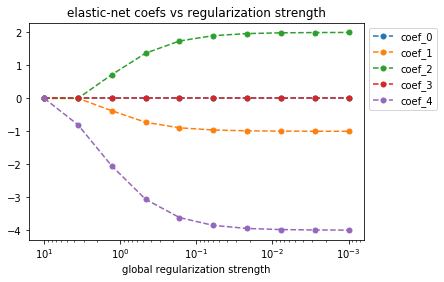

In [7]:
intercepts_coefs = models.plot_intercept_coefs()

In [8]:
display(intercepts_coefs)

,coef_0,coef_1,coef_2,coef_3,coef_4,intercept
reg_lambda,,,,,,
10.000000,0.0,0.000000,0.000000,0.0,0.000000,-1.0
3.593814,0.0,0.000000,0.000000,0.0,-0.802443,-1.0
1.291550,0.0,-0.376973,0.718519,0.0,-2.052236,-1.0
0.464159,0.0,-0.726523,1.369177,0.0,-3.062696,-1.0
0.166810,0.0,-0.893972,1.738770,0.0,-3.616022,-1.0
0.059948,0.0,-0.960856,1.900700,0.0,-3.854667,-1.0
0.021544,0.0,-0.985798,1.963558,0.0,-3.946751,-1.0
0.007743,0.0,-0.994879,1.986803,0.0,-3.980728,-1.0
0.002783,0.0,-0.998157,1.995244,0.0,-3.993056,-1.0
